In [26]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# custom imports
from regression_class import RedditRegression as rr
from regression_class import TimestampClass

In [33]:
# infiles
regression_infile = "regression_thread_data.p"
thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'linear_regressions/thread_size/author_threshold'
metrics_outfile = "regression_metrics"

In [30]:
# params
X_COLS = [
    'sentiment_sign', 'sentiment_magnitude', 'hour', 'num_dayofweek','activity_ratio',
    'mean_author_sentiment_sign', 'mean_author_sentiment_magnitude', 'log_author_all_activity_count',
    ]
y_col = 'log_thread_size'

# regression params dict
regression_params = {
    'collection_window': 7,
    'validation_window': 7,
    'regression_type': 'linear',
    'FSS': True,
    'performance_scoring_method': 'r2',
    'x_cols': X_COLS,
    'y_col': y_col,
    'metrics': ['r2'],
    'activity_threshold': 2,
}

In [34]:
# make out params df to save to spreadsheet
out_params = {}
out_params['regression_infile'] = regression_infile
out_params['thread_infile'] = thread_infile

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)


In [52]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))
thread_df = pickle.load(open(thread_infile, 'rb'))

In [53]:
for subreddit in regression_df:
    regression_df[subreddit]['log_score'] = np.log(regression_df[subreddit].score + 1)

In [54]:
pickle.dump(regression_df, open(regression_infile, 'wb'))

In [10]:
y_cols_to_log = ['thread_size', 'authors']
for subreddit in regression_df:
    for col in y_cols_to_log:
        regression_df[subreddit][f'log_{col}'] = np.log(regression_df[subreddit][col])

In [36]:
regression_df.pop('thedonald')

,thread_id,thread_size,authors,timestamp,author,score,subject_sentiment_score,sentiment_sign,sentiment_magnitude,success,log_thread_size,log_authors
0,bjbgrk,1,1,2019-05-01 01:25:19,c3049a30346f6fba4a55fe8b1ca2ab2065afba29e80b8947,1,0.00000,0.0,0.00000,0,0.000000,0.000000
1,bjc0jc,1,1,2019-05-01 02:21:16,7301fc74f2a878ba2e16fe8d4f70929990139a79d008a444,1,0.00000,0.0,0.00000,0,0.000000,0.000000
2,bjf1u7,10,7,2019-05-01 09:17:44,d7752a0a4ec4d3d404835cce88793dca9e0fb0a2aaf6d64e,238,-0.55740,-1.0,0.55740,1,2.302585,1.945910
3,bjg6gx,1,1,2019-05-01 11:51:27,11640fec8a8f4e5b056bae0d7978339da0b82986e847cb03,5,0.66890,1.0,0.66890,0,0.000000,0.000000
4,bjg79z,1,1,2019-05-01 11:54:11,11640fec8a8f4e5b056bae0d7978339da0b82986e847cb03,8,0.31820,1.0,0.31820,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
486,c707tf,3,3,2019-06-29 15:26:21,0611472cc4544b9117f3a9b13b7188720f7ae334278cb5b8,0,0.00000,0.0,0.00000,1,1.098612,1.098612
487,c72dnf,2,2,2019-06-29 17:54:17,be3e26871026511cfd2407471070ee155190ea672ac8b47e,0,0.34000,1.0,0.34000,1,0.693147,0.693147
488,c73kkr,1,1,2019-06-29 19:36:14,514046fce1d2cf290e2ad4504cd0c0ad6d29942c0364f200,1,0.00000,0.0,0.00000,0,0.000000,0.000000
489,c74hbo,1,1,2019-06-29 20:55:36,0ffab1a67640b0b0666fdaa28ab2ebd706c7bbf71a3aed6d,1,-0.42675,-1.0,0.42675,0,0.000000,0.000000


In [13]:
pickle.dump(regression_df, open(regression_infile, 'wb'))

In [37]:
successful_threads = {}
for subreddit in regression_df:
    successful_threads[subreddit] = regression_df[subreddit][
        regression_df[subreddit].thread_size > 1
        ]
    
    print(subreddit)
    print(len(successful_threads[subreddit])/len(regression_df[subreddit]))

books
0.3260050251256281
conspiracy
0.8490566037735849
crypto
0.45687677149412875
politics
0.6527554596513782


In [38]:

successful_threads = {}
for subreddit in regression_df:
    successful_threads[subreddit] = regression_df[subreddit][
        regression_df[subreddit].thread_size > 1
        ]

# place to regression objects
subreddit_regressions = {}

# go through subreddits and run regressions
for subreddit in regression_df:
    print(f'###{subreddit}###')
    regression_params['name'] = subreddit
    regression_params['regression_data'] = successful_threads[subreddit]
    regression_params['thread_data'] = thread_df[subreddit]

    subreddit_regressions[subreddit] = rr(regression_params)
    subreddit_regressions[subreddit].main()



###books###
# Period 1 #
Performing thresholding
Performing thresholding
Running FSS
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


###conspiracy###
# Period 1 #
Performing thresholding
Performing thresholding
Running FSS
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model 8
###crypto###
# Period 1 #
Performing thresholding
Performing thresholding
Running FSS
Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


###politics###
# Period 1 #
Performing thresholding
Performing thresholding
Running FSS


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Model 1
Model 2
Model 3
Model 4
Model 5
Model 6
Model 7
Model 8


In [39]:
"""
# place to regression objects
subreddit_regressions = {}

# go through subreddits and run regressions
for subreddit in regression_df:
    print(f'###{subreddit}###')
    regression_params['name'] = subreddit
    regression_params['regression_data'] = regression_df[subreddit]
    regression_params['thread_data'] = thread_df[subreddit]

    subreddit_regressions[subreddit] = rr(regression_params)
    subreddit_regressions[subreddit].main()

"""

"\n# place to regression objects\nsubreddit_regressions = {}\n\n# go through subreddits and run regressions\nfor subreddit in regression_df:\n    print(f'###{subreddit}###')\n    regression_params['name'] = subreddit\n    regression_params['regression_data'] = regression_df[subreddit]\n    regression_params['thread_data'] = thread_df[subreddit]\n\n    subreddit_regressions[subreddit] = rr(regression_params)\n    subreddit_regressions[subreddit].main()\n\n"

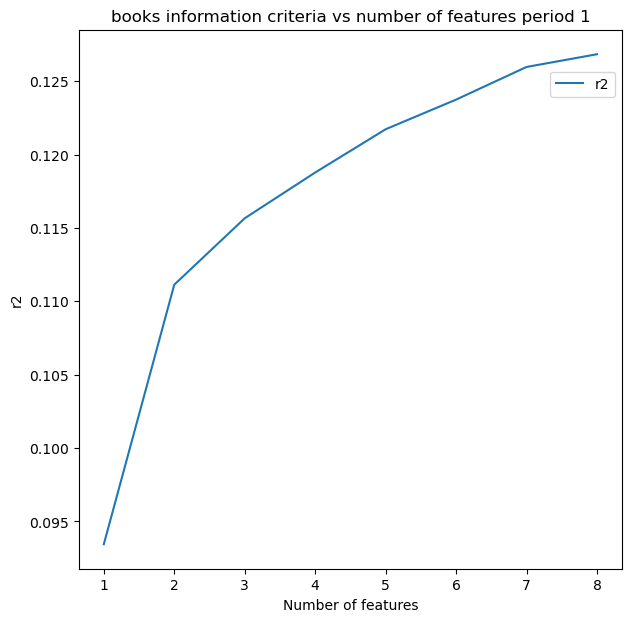

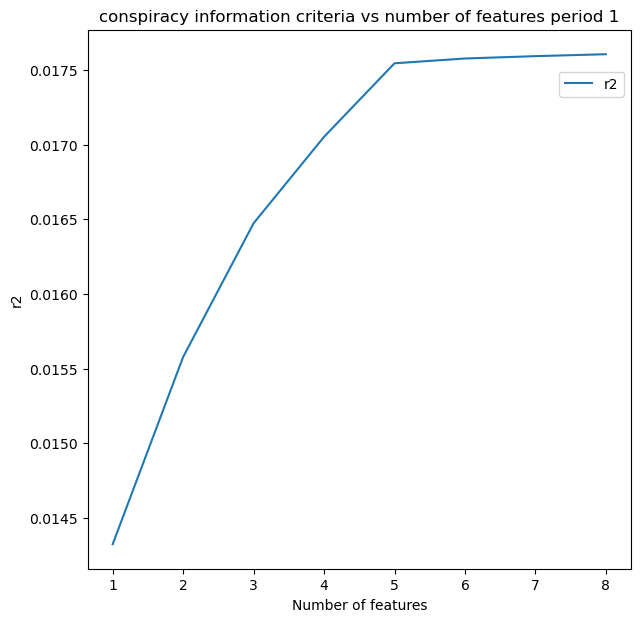

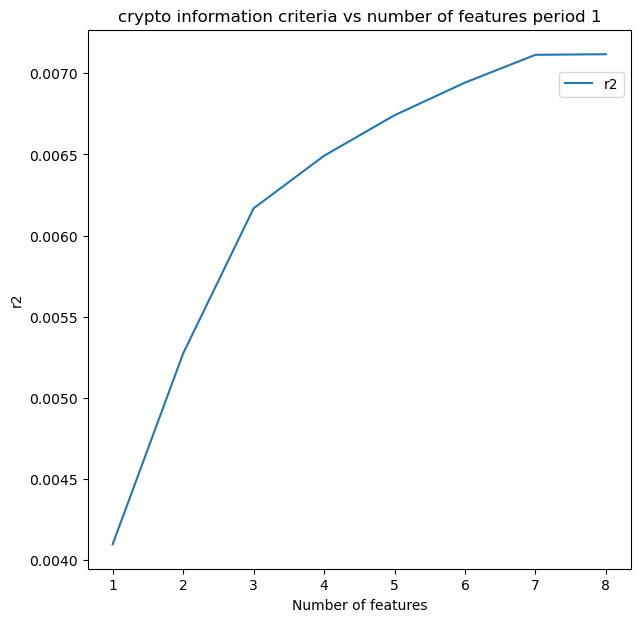

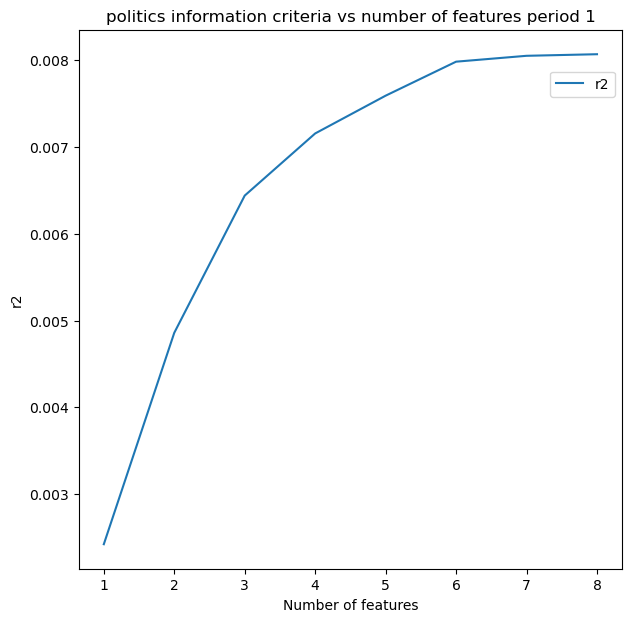

In [40]:
for subreddit in subreddit_regressions:
    for period in subreddit_regressions[subreddit].regression_metrics:
        subreddit_regressions[subreddit].plot_metrics_vs_features_one_period(
            period, ['r2'], name=f'{subreddit}', legend_loc=(0.9,0.83),
            outfile=f"{outdir}/{subreddit}_p{period}"
            
        )

In [41]:
for subreddit in subreddit_regressions:
    subreddit_regressions[subreddit].get_FSS_metrics_df()
    subreddit_outfile = f"{outdir}/{subreddit}_{metrics_outfile}.xlsx"
    subreddit_regressions[subreddit].output_to_excel(subreddit_outfile,
                                                     params_to_add=out_params)

In [42]:
pickle.dump(subreddit_regressions, open(f'{outdir}/all_regressions.p', 'wb'))